<a href="https://colab.research.google.com/github/HR-HBM/FCC/blob/main/FlowersClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install opencv-python
!pip install scikit-learn
!pip install pandas
!pip install imutils

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')
TRAIN_DIR = "/content/drive/MyDrive/flower images/train"
TEST_DIR = "/content/drive/MyDrive/flower images/test"
VAL_DIR = "/content/drive/MyDrive/flower images/validate"

Mounted at /content/drive


In [4]:
# data augmentation

train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

train_set = train_datagen.flow_from_directory(TRAIN_DIR, target_size=(224,224), batch_size=32, class_mode="categorical")

val_datagen = ImageDataGenerator(rescale = 1. / 255)

val_set = train_datagen.flow_from_directory(VAL_DIR, target_size=(224, 224), batch_size=32, class_mode="categorical")



Found 3020 images belonging to 5 classes.
Found 649 images belonging to 5 classes.


In [5]:
# build model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size= (5,5), padding='same', activation='relu', input_shape=[224,224,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size= (5,5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters=96, kernel_size= (5,5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# flattening
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense (units=512, activation='relu'))

# last layer
model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 96)          │         153,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 75264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      38,535,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,745,637 (147.80 MB)

 Trainable params: 38,745,637 (147.80 MB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_set, validation_data=val_set, batch_size=32, epochs=20)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)
print(val_acc)




Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 731s 7s/step - accuracy: 0.2435 - loss: 3.2403 - val_accuracy: 0.4622 - val_loss: 1.2839
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 60s 601ms/step - accuracy: 0.4216 - loss: 1.4229 - val_accuracy: 0.4838 - val_loss: 1.3039
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 61s 596ms/step - accuracy: 0.4971 - loss: 1.2420 - val_accuracy: 0.5300 - val_loss: 1.1266
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 61s 603ms/step - accuracy: 0.5383 - loss: 1.1396 - val_accuracy: 0.6194 - val_loss: 0.9914
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 78s 567ms/step - accuracy: 0.6088 - loss: 1.0045 - val_accuracy: 0.6009 - val_loss: 1.0344
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 58s 585ms/step - accuracy: 0.6517 - loss: 0.9157 - val_accuracy: 0.6148 - val_loss: 0.9722
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 82s 585ms/step - accuracy: 0.6719 - loss: 0.8331 - val_accuracy: 0.6348 - val_loss: 0.9185
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 81s 573ms/step - accuracy: 0.7014 - loss: 0.7876 - val_accuracy: 0.6271 

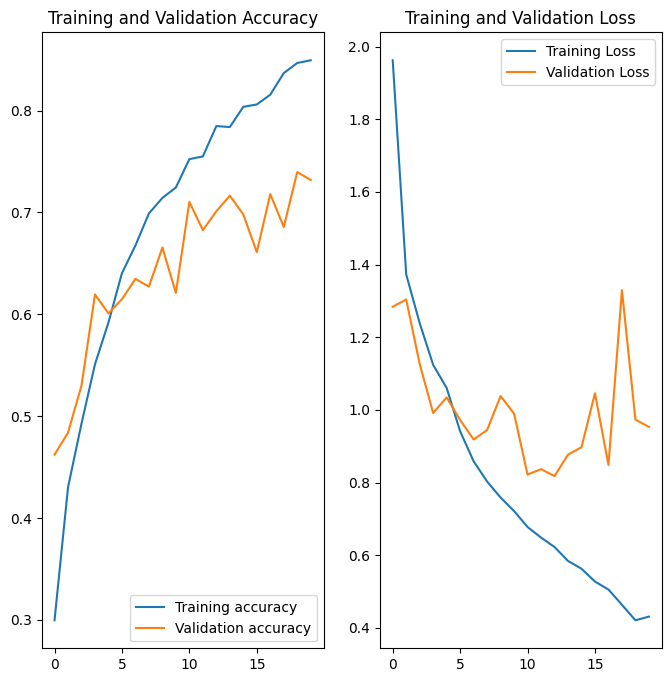

In [11]:
epochs_range = range(20)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Training accuracy")
plt.plot(epochs_range, val_acc, label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()

In [12]:
model.save("/content/drive/MyDrive/flower images/flowers.h5")